## Estimating the bicycle architecture capabilities using random circuits

In [1]:
import os
os.chdir('..')
from analyze.read_numerics import read_numerics
from analyze.random_numerics import partition_data, group_partitioned, compute_means, plot_mean

In this notebook, we compute and plot the circuit failure probability for random circuits.

We assume that the random circuits have already been generated and analyzed and that the results have been collated into a single file. We'll give a brief description of the data below. You can start reading it while you wait 20 seconds for the data to be read.

This data was generated by several instances of the executable `random_numerics`.

In [2]:
%time data = read_numerics("./data/random_numerics_output.csv")

CPU times: user 19.9 s, sys: 1.67 s, total: 21.6 s
Wall time: 21.7 s


The data in `data` consists of eight trials for each of six sets of input parameters. Each set of parameters defines a data set. We partition the data by dataset.

In [3]:
partdata = partition_data(data)

104 lines in data set (code=gross, p=0.001, q=5)
800000 lines in data set (code=two-gross, p=0.001, q=50)
800000 lines in data set (code=gross, p=0.0001, q=5)
296390 lines in data set (code=gross, p=0.0001, q=50)
800000 lines in data set (code=two-gross, p=0.0001, q=50)
800000 lines in data set (code=two-gross, p=0.0001, q=500)


Within one data set, the data for each of the eight trials are stacked vertically in one-d arrays. We want to group the data by trial. The one-d arrays of $n \times 8$ elements will be converted into two-d arrays with shape $(8, n)$.

In [4]:
grouped_data =  group_partitioned(partdata)

Here are the labels on the columns written by `random_numerics`. They are the same for all data sets.

In [5]:
list(grouped_data[('two-gross', 0.001, 50)].keys())

['code',
 'p',
 'i',
 'qubits',
 't_injs',
 'automorphisms',
 'measurements',
 'joint_measurements',
 'measurement_depth',
 'end_time',
 'total_error']

In this notebook, we are interested only in 'total_error'. We will compute the mean of this error across the eight trials. Then we will plot the result as a function of the number of logical T gates. Each input instruction in the random circuits is a Pauli-generated rotation with angle $\pi/4$. Upon compilation, each input instruction results, in general, in several ISA instructions of the types in the list above. But each instruction produces only a single T gate. For the coordinate axis, we use the index of the instruction, because for these random circuits, this is the same as the cumulative number of T-gates.

The result of the computation of the means will be written directly into the dict for each data set. This adds a key called "mean_error" to the list above.

In [6]:
compute_means(grouped_data)

Here we plot the mean for each data set.

Compare this plot to Figure 17 on page 66 of [_Tour de gross ..._ arxiv:2506.03094](https://arxiv.org/abs/2506.03094)

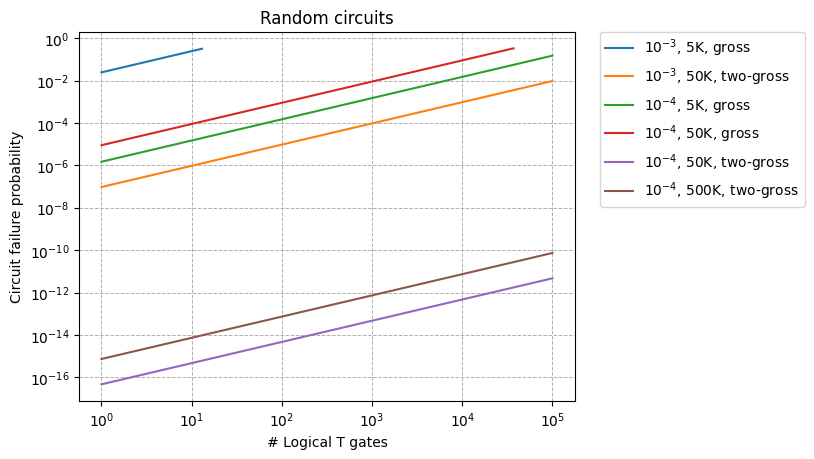

In [7]:
plot_mean(grouped_data)